In [66]:
!pip install seaborn

In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize": (10, 10)})
palette = {"True": "tab:green", "False": "tab:red"}

In [68]:
eval_df = pd.read_csv("train_evaluation.csv").drop("Unnamed: 0", axis=1)

In [69]:
eval_df["score"] = eval_df["score"] / 100
eval_df

,to_delta,to_drop,pca,augmented,run,score,f1_macro,precision_macro,recall_macro,accuracy,epoch
0,features,confidence_features,True,False,4,0.893617,0.804383,0.875648,0.760604,0.880252,10.0
1,features,confidence_features,True,False,4,0.884043,0.809135,0.870178,0.766412,0.878353,20.0
2,features,confidence_features,True,False,4,0.911702,0.798885,0.866606,0.756065,0.868095,30.0
3,features,confidence_features,True,False,4,0.913830,0.806080,0.871029,0.761712,0.874858,40.0
4,features,confidence_features,True,False,4,0.898936,0.804986,0.874200,0.759247,0.875541,50.0
...,...,...,...,...,...,...,...,...,...,...,...
1195,features,confidence_features,True,False,3,0.889362,0.807829,0.848848,0.779172,0.873338,60.0
1196,features,confidence_features,True,False,3,0.930851,0.813288,0.861947,0.775774,0.880936,70.0
1197,features,confidence_features,True,False,3,0.875532,0.805019,0.851265,0.772755,0.871666,80.0
1198,features,confidence_features,True,False,3,0.895745,0.804874,0.853075,0.770193,0.874782,90.0


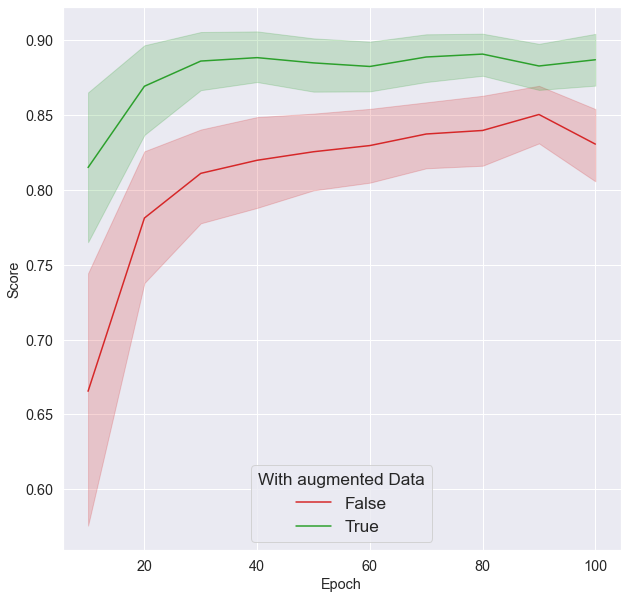

In [75]:
group = eval_df["augmented"].astype(str)
sns.lineplot(x="epoch", y="score", data=eval_df, hue=group, legend="brief", palette=palette)
plt.legend(title="With augmented Data", loc=8, fontsize="x-large", title_fontsize="x-large")
plt.xticks(fontsize="large")
plt.yticks(fontsize="large")
plt.xlabel("Epoch", fontsize="large")
plt.ylabel("Score", fontsize="large")
plt.show()

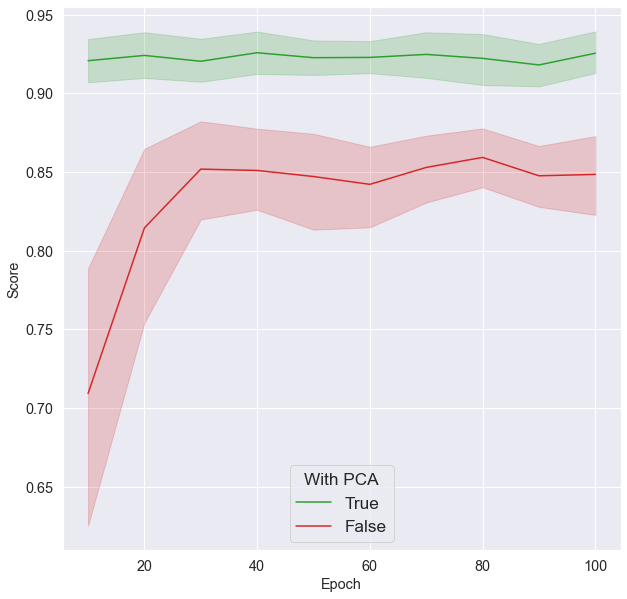

In [76]:
eval_df_with_augmentation = eval_df[eval_df["augmented"] == True]
group = eval_df_with_augmentation["pca"].astype(str)
sns.lineplot(x="epoch", y="score", data=eval_df_with_augmentation, hue=group, legend="brief", palette=palette)
plt.legend(title="With PCA", loc=8, fontsize="x-large", title_fontsize="x-large")
plt.xlabel("Epoch", fontsize="large")
plt.ylabel("Score", fontsize="large")
plt.xticks(fontsize="large")
plt.yticks(fontsize="large")
plt.show()

In [72]:
eval_df_with_augmentation_and_pca = eval_df_with_augmentation[eval_df_with_augmentation["pca"] == True]

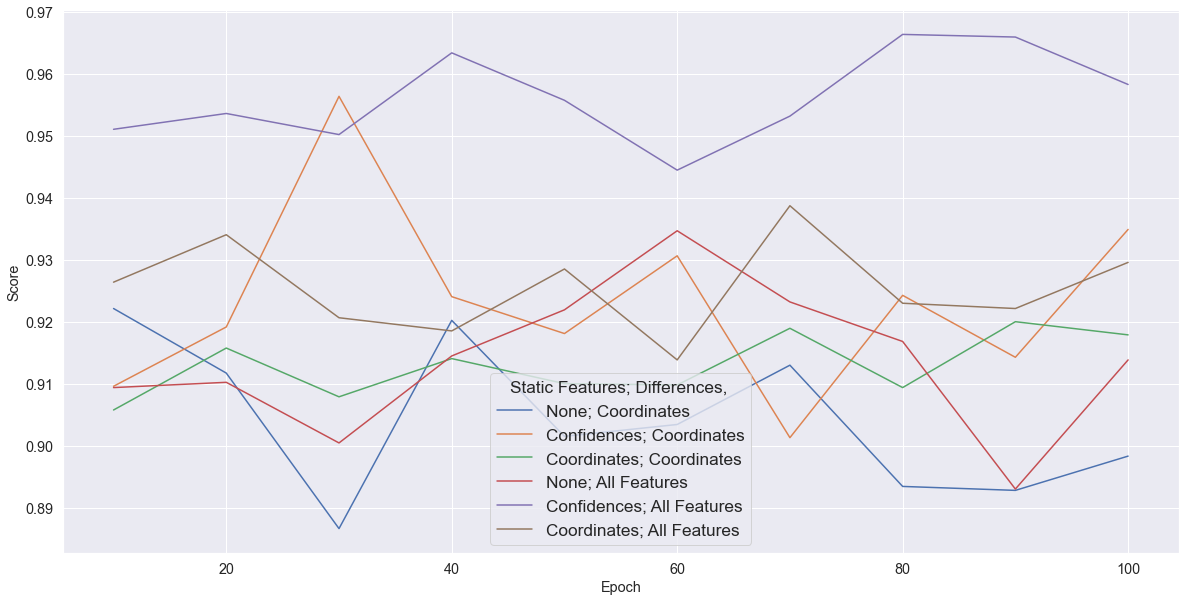

In [77]:
group = eval_df_with_augmentation_and_pca["to_drop"].astype(str) + ", " + eval_df_with_augmentation_and_pca["to_delta"].astype(str)
sns.set(rc={"figure.figsize": (20, 10)})
sns.lineplot(x="epoch", y="score", data=eval_df_with_augmentation_and_pca, hue=group, legend="auto", ci=None)
plt.legend(
    title="Static Features; Differences, ",
    loc=8,
    labels=[
        "None; Coordinates",
        "Confidences; Coordinates",
        "Coordinates; Coordinates",
        "None; All Features",
        "Confidences; All Features",
        "Coordinates; All Features",
    ],
    fontsize="x-large",
    title_fontsize="x-large",
)
plt.xlabel("Epoch", fontsize="large")
plt.ylabel("Score", fontsize="large")
plt.xticks(fontsize="large")
plt.yticks(fontsize="large")
plt.show()